# STA130 Homework 08

### Chatlog stack:<br>
- Question 1: https://chatgpt.com/share/67393517-e548-8008-9389-7456efe72611
- Question 2: https://chatgpt.com/share/673a75ae-cfcc-8008-b9cd-685daac4f6ec
- Question 3-4: https://chatgpt.com/share/673c06b1-ac3c-8008-b2f9-46776fda1bd1
- Question 6,8-9: https://chatgpt.com/share/673c25f6-74b8-8008-9a76-a353fcece184

### Question 1.<br>

#### Part A:<br>
**Classification**: Targets are **discrete categories** (e.g., spam or not spam, disease present or absent).<br>
**Regression**: Targets are continuous values (e.g., predicting house prices or temperatures).<br>
 
Some examples:
- Email Filtering: Classifying emails as “spam” or “not spam.”
- Credit Scoring: Approving or denying loan applications based on financial and personal data.

Use classification trees when:
- The relationship between variables is complex and nonlinear.
- You want an interpretable and visual model of interactions.
- You don’t know in advance which interactions might be significant.

Use interaction terms in regression when:
- You have strong domain knowledge suggesting specific interactions.
- You are modeling simpler, primarily linear relationships.

About the interaction terms in classification decision tree:
- The splits in a decision tree divide the data into subgroups, **conditioning later splits on earlier ones**.
- This process inherently models interactions, as the importance of a feature in later splits depends on the conditions set by earlier splits.

#### Part B:<br>

| **Aspect**               | **Classification Decision Tree**                                     | **Multiple Linear Regression**                                   |
|---------------------------|---------------------------------------------------------------------|-----------------------------------------------------------------|
| **Flexibility**           | Handles non-linear relationships and interactions effectively.      | Limited to linear relationships unless features are transformed.|
| **Interpretability**      | Easy to understand and visualize (via tree structure).              | Coefficients provide direct insight into feature importance.    |
| **Target Type**           | Categorical.                                                       | Continuous.                                                    |
| **Handling of Outliers**  | Robust to outliers.                                                | Sensitive to outliers.                                         |
| **Feature Independence**  | Does not assume independence between features.                     | Assumes features are independent (for reliable coefficient estimates). |

When talking about the **outliers**:
- Classification: Outliers typically fall into their **own branch or leaf**, meaning they do not significantly influence the structure of the tree
- MLR: Outliers can have a disproportionately large influence on the model because their residuals are squared, heavily weighting their impact.


### Question 2.

1. **Accuracy** measures the proportion of true results (both true positives and true negatives) in the population.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

#### Examples: <br>
Email Spam Detection. A company uses a model to classify emails as either “spam” or “not spam.”

#### Rationale:
- Both TP (correctly classified spam) and TN (correctly classified legitimate emails) are equally important to measure the system’s effectiveness.
- In spam detection, the **cost of a misclassification** might be **balanced** or relatively low. We can find the emails in bin or put the email into bin.



2. **Sensitivity** measures the proportion of actual positives that are correctly identified.

$$\text{Sensitivity} = \frac{TP}{TP + FN}$$

#### Example:<br>
Medical Diagnostics. E.g. COVID-19
#### Rationale: 
- Sensitivity is suitable for use in scenarios where the cost of FN is high, in order to reduce the significant risks caused by missed reports.
- In this case, the cost for FN may cause serious public health security incidents. You know, Wuhan, China. So the institutions tried their best to avoid FN cases.

3. **Specificity** measures the proportion of actual negatives that are correctly identified.

$$\text{Specificity} = \frac{TN}{TN + FP}$$

#### Example:<br>
Network security (normal traffic identification)
#### Rationale: 
- Specificity is suitable for use in scenarios where the cost of FP is high, in order to avoid interference with normal operations in network security.
- Misjudging normal traffic as malicious traffic (FP) may cause the system to block normal services requests, causing user experience problems or operational interruptions

4. **Precision** measures the proportion of positive identifications that were actually correct.
$$\text{Precision} = \frac{TP}{TP + FP}$$

#### Example:<br>
Product Recommendation in e-commerce platforms
#### Rationale: 
- Precision is crucial when the cost of a FP is high, thus it is undesired. 
- Recommending irrelevant products (FP) can annoy customers and reduce trust in the recommendation system. The platform may lose revenue due to such reasons. The maeketing resources are also wasted.

### Question 3.<br>

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import matplotlib.pyplot as plt

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Preprocessing
# 1. Remove specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# 2. Drop rows with NaN entries and create a new DataFrame explicitly
ab_reduced_noNaN = ab_reduced.dropna().copy()

# 3. Set data types for specific columns
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Exploratory Data Analysis (EDA)
# Summarize dataset
print("Shape of the dataset:", ab_reduced_noNaN.shape)
print("Columns in the dataset:", ab_reduced_noNaN.columns.tolist())
print("Data types of each column:\n", ab_reduced_noNaN.dtypes)
print("Missing values in each column:\n", ab_reduced_noNaN.isnull().sum())
print("First few rows of the dataset:\n", ab_reduced_noNaN.head())

Shape of the dataset: (319, 10)
Columns in the dataset: ['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper', 'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Thick']
Data types of each column:
 Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object
Missing values in each column:
 Title            0
Author           0
List Price       0
Amazon Price     0
Hard_or_Paper    0
NumPages         0
Publisher        0
Pub year         0
ISBN-10          0
Thick            0
dtype: int64
First few rows of the dataset:
                                                Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Do

### Question 4.

```python
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]
```

`pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']`<br>
- Converts the categorical column Hard_or_Paper into binary dummy variables. Each unique value in the Hard_or_Paper column becomes a separate binary (0/1) column.
- `['H']`: This means hardcover book will have 1, while papercover book have 0

`ab_reduced_noNaN[['List Price']]`<br>
1. Select the List Price column from the DataFrame as predictor variable for the model.

Training data observations: 255
Testing data observations: 64


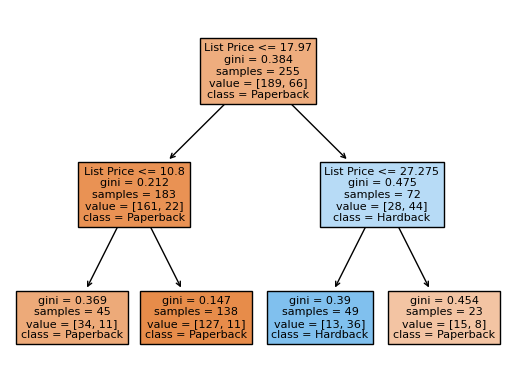

In [3]:
# Create an 80/20 train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Print sizes of training and testing datasets
print(f"Training data observations: {len(ab_reduced_noNaN_train)}")
print(f"Testing data observations: {len(ab_reduced_noNaN_test)}")

# Extract features and labels for training
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']
X_train = ab_reduced_noNaN_train[["List Price"]]

# Train the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the tree
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardback"], filled=True)
plt.show()

### 5. Repeat the previous problem but this time visualize the *classification decision tree* based on the following specifications below; then explain generally how predictions are made for the *clf2* model<br>

1. `X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]`
2. `max_depth` set to `4`

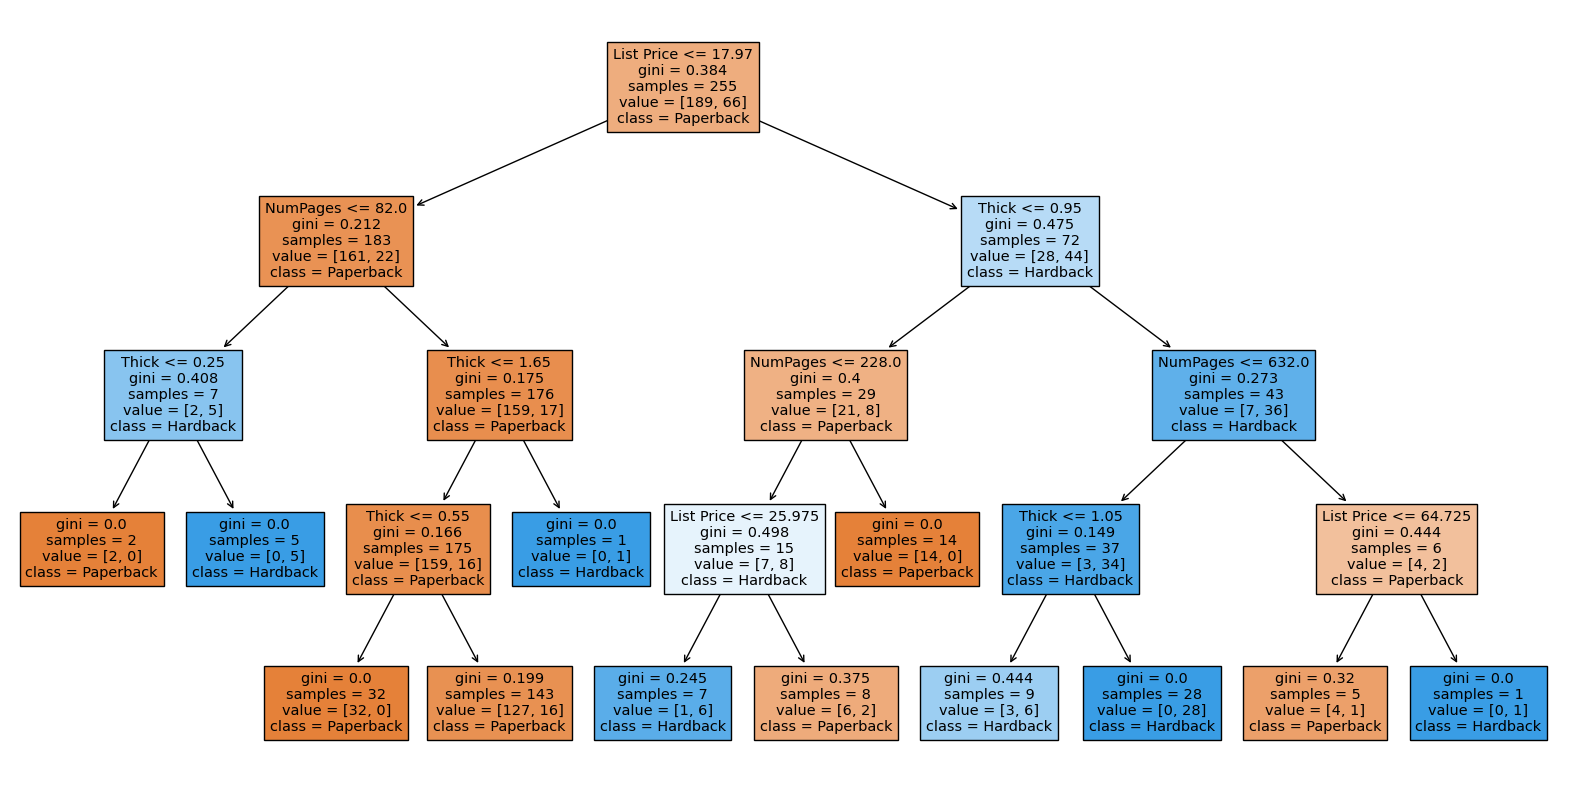

In [4]:
# Extract features and target for training
X_train = ab_reduced_noNaN_train[["NumPages", "Thick", "List Price"]]
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"]

# Train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

# Visualize the decision tree using tree.plot_tree
plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf2,
    feature_names=["NumPages", "Thick", "List Price"],
    class_names=["Paperback", "Hardback"],
    filled=True
)
plt.show()

### 6. Use previously created *ab_reduced_noNaN_test* to create confusion matrices for *clf* and *clf2*. Report the sensitivity, specificity and accuracy for each of the models<br>

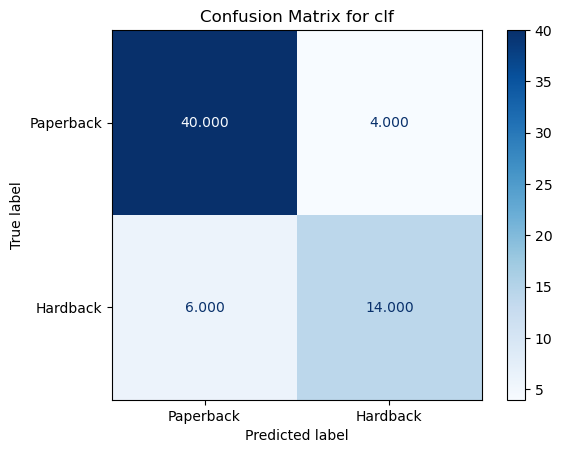

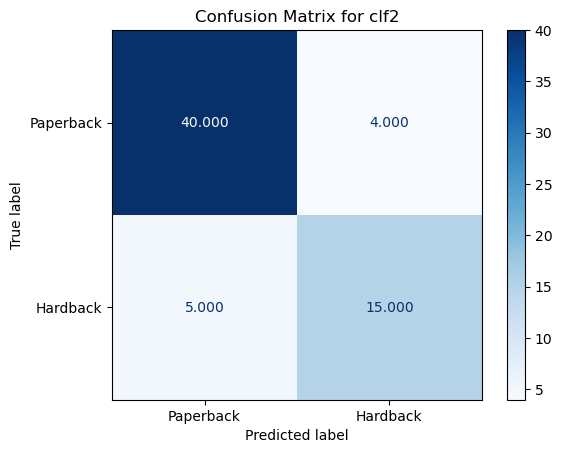

clf Metrics: Sensitivity = 0.700, Specificity = 0.909, Accuracy = 0.844
clf2 Metrics: Sensitivity = 0.750, Specificity = 0.909, Accuracy = 0.859


In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score

# Prepare test data
X_test = ab_reduced_noNaN_test[["List Price"]]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

# Predictions for clf
y_pred_clf = clf.predict(X_test)

# Confusion Matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=["Paperback", "Hardback"])
disp_clf.plot(cmap="Blues", values_format=".3f")
plt.title("Confusion Matrix for clf")
plt.show()

# Calculate metrics for clf
sensitivity_clf = recall_score(y_test, y_pred_clf)
specificity_clf = cm_clf[0, 0] / (cm_clf[0, 0] + cm_clf[0, 1])
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Test for clf2
X_test2 = ab_reduced_noNaN_test[["NumPages", "Thick", "List Price"]]
y_pred_clf2 = clf2.predict(X_test2)

# Confusion Matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=["Paperback", "Hardback"])
disp_clf2.plot(cmap="Blues", values_format=".3f")
plt.title("Confusion Matrix for clf2")
plt.show()

# Calculate metrics for clf2
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)
specificity_clf2 = cm_clf2[0, 0] / (cm_clf2[0, 0] + cm_clf2[0, 1])
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Display results
print(f"clf Metrics: Sensitivity = {sensitivity_clf:.3f}, Specificity = {specificity_clf:.3f}, Accuracy = {accuracy_clf:.3f}")
print(f"clf2 Metrics: Sensitivity = {sensitivity_clf2:.3f}, Specificity = {specificity_clf2:.3f}, Accuracy = {accuracy_clf2:.3f}")

### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for *clf* and *clf2*) are better<br>

```python
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
```

#### Differences between the two matrices here:<br>
- `model 1` uses only `List Price` to distinguish between the Paper and Hard cover, resulting in a simple model that cannot generalize well to the test data. <br>
- `model 2` incorporates multiple features, including `NumPages`, `Thick`, and `List Price`, making the classification more comprehensive and complex. This allows the model to better fit the data, reduce bias, improve accuracy, and enhance generalization ability when dealing with unobserved data.

#### Why the two above are better:
- `clf2` shows higher sensitivity and overall higher accuracy
- Both of the models have similar specificity.
-  These two are better because they evaluate the models with **test data**, which was not seen during training. This ensure that the metrics reflect the models' ability to generalize to unobserved data.<br>
The two models provided above evaluate the model with the **training data**, which may lead to overfitting due to mullticollinearity.

The model should always be evaluated on test data for a fair assessment of predicative performance.


### 8. Read the paragraphs in *Further Guidance* and ask a ChatBot how to visualize *feature Importances* available for *scikit-learn* *classification decision trees*; do so for *clf2*;  and use *.feature_names_in_* corresponding to *.feature_importances_* to report which *predictor variable* is most important for making predictions according to *clf2*<br>

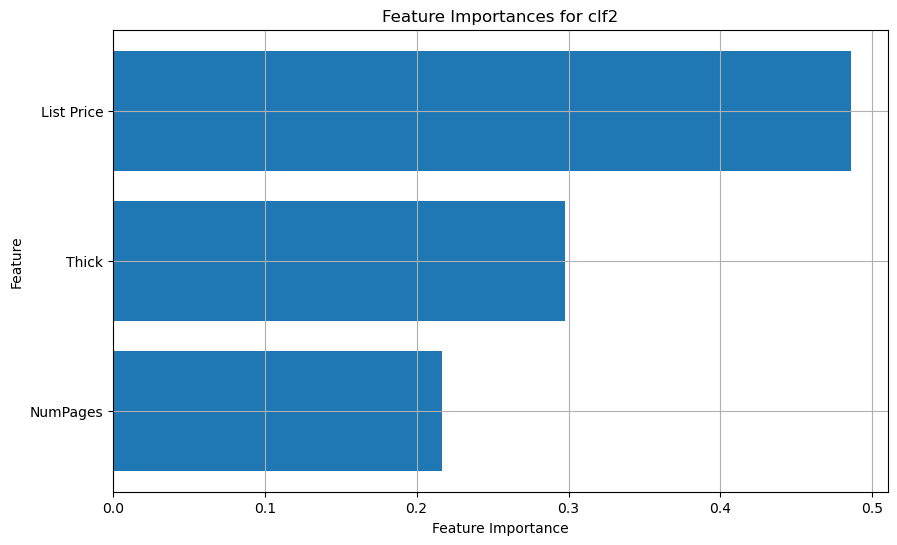

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_importances = clf2.feature_importances_
feature_names = ['NumPages', 'Thick', 'List Price']

# Plot feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, align='center')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for clf2')
plt.grid(True)
plt.show()

In [7]:
# Access feature importances and their corresponding names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Identify the most important feature
most_important_index = np.argmax(feature_importances)
most_important_feature = feature_names[most_important_index]

# Report the most important predictor
print(f"The most important predictor variable is: '{most_important_feature}' with an importance of {feature_importances[most_important_index]:.4f}")

The most important predictor variable is: 'List Price' with an importance of 0.4860


### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences<br>

- In linear regression models, coefficients represent the direct relationship between each predictor and the target variable, assuming all other predictors are held constant. They indicate the magnitude and direction (positive or negative) of the effect of a unit change in a predictor. 
- Feature importances in decision trees reflect how much a feature contributes to **reducing impurity** (e.g., Gini or entropy) across splits in the tree, making them less straightforward to interpret in terms of direct effect but useful for understanding relative importance in predictions.<br>
Least impurity, best split constructed.

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>

I am always on the way to do it XD